In [6]:
from cleanvision import Imagelab
from tifffile import imread
from pathlib import Path
import numpy as np

In [7]:
RAW_DATA_PATH = Path("/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/")

In [8]:
image_path = list(sorted(Path(RAW_DATA_PATH).rglob("image*")))

In [9]:
image_path = [
    str(tmp_path) for tmp_path in image_path if "2413" not in str(tmp_path)
]  # image 2413 has issues.

In [10]:
imagelab = Imagelab(filepaths=image_path)

In [11]:
imagelab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


100%|██████████| 56950/56950 [01:31<00:00, 625.55it/s] 


Issue checks completed. 105920 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Removing near_duplicates from potential issues in the dataset as it exceeds max_prevalence=0.5 
Removing light from potential issues in the dataset as it exceeds max_prevalence=0.5 
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  2 | low_information  |          139 |
|  3 | exact_duplicates |           27 |
|  4 | dark             |           21 |
|  5 | odd_aspect_ratio |            0 |
|  6 | blurry           |            0 |
|  7 | grayscale        |            0 |
|  8 | odd_size         |            0 | 

------------------ low_information images ------------------

Number of examples with this issue: 139
Examples representing most severe instances of this issue:



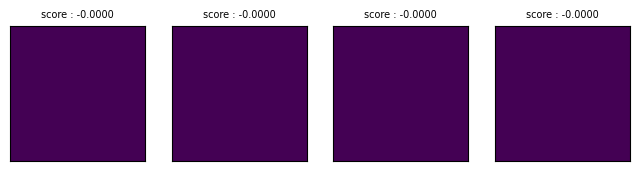

----------------- exact_duplicates images ------------------

Number of examples with this issue: 27
Examples representing most severe instances of this issue:

Set: 0


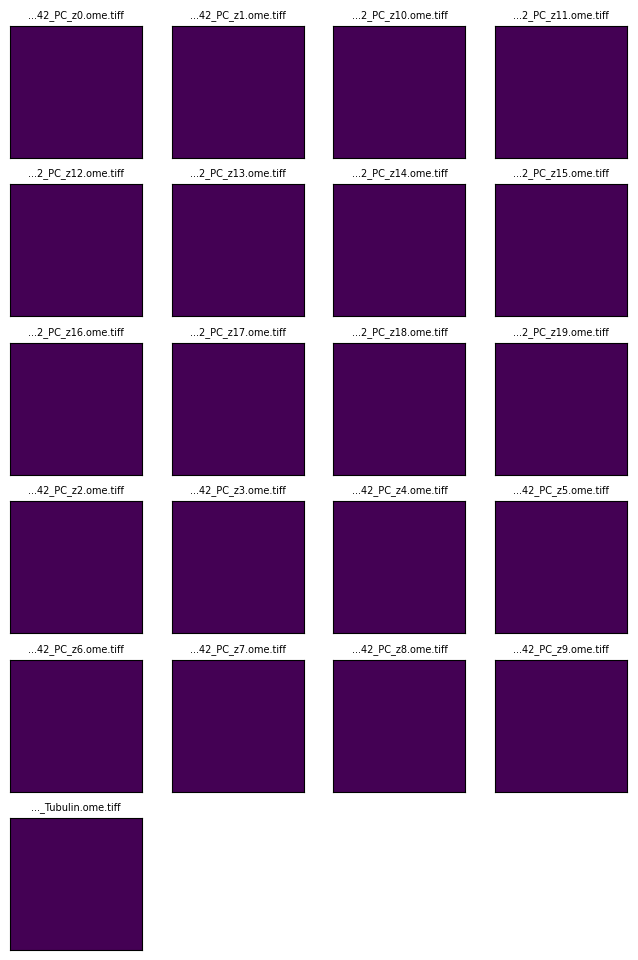

Set: 1


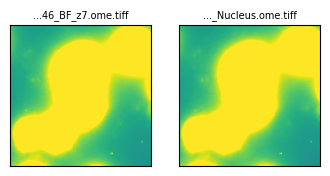

Set: 2


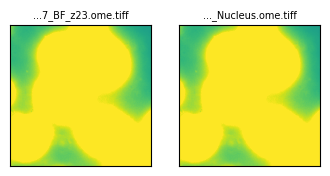

Set: 3


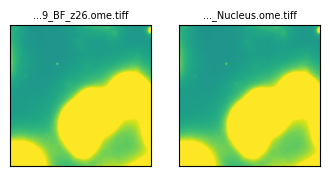

----------------------- dark images ------------------------

Number of examples with this issue: 21
Examples representing most severe instances of this issue:



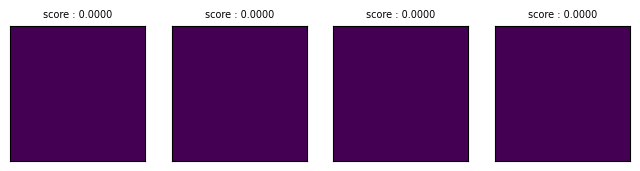

In [12]:
imagelab.report()

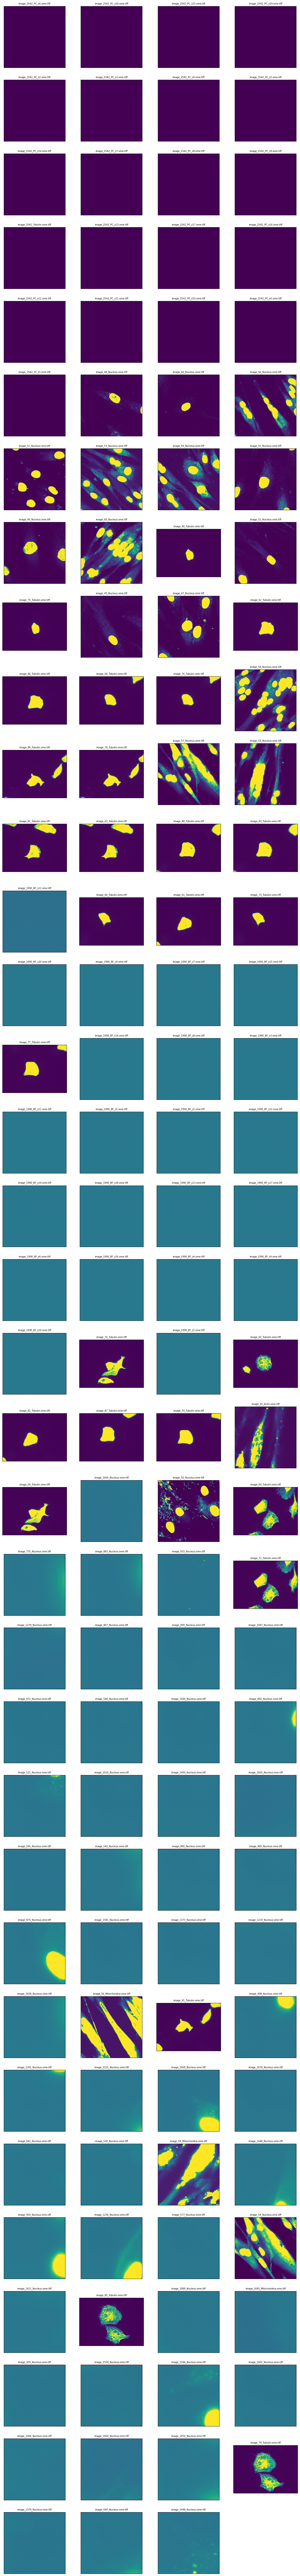

In [118]:
low_info_images = imagelab.issues[
    imagelab.issues["is_low_information_issue"] == True
].sort_values(by=["low_information_score"])
low_info_images = low_info_images.index.tolist()
imagelab.visualize(image_files=low_info_images[:139], cell_size=(4, 4))

In [120]:
exact_duplicates_images = imagelab.issues[
    imagelab.issues["is_exact_duplicates_issue"] == True
].sort_values(by=["exact_duplicates_score"])
exact_duplicates_images = exact_duplicates_images.index.tolist()

In [121]:
exact_duplicates_images

['/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/study_16_to_30/Study_29/image_2542_PC_z0.ome.tiff',
 '/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/study_16_to_30/Study_29/image_2542_Tubulin.ome.tiff',
 '/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/study_16_to_30/Study_29/image_2542_PC_z9.ome.tiff',
 '/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/study_16_to_30/Study_29/image_2542_PC_z8.ome.tiff',
 '/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/study_16_to_30/Study_29/image_2542_PC_z7.ome.tiff',
 '/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/study_16_to_30/Study_29/image_2542_PC_z6.ome.tiff',
 '/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/study_16_to_30/Study_29/image_2542_PC_z5.ome.tiff',
 '/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/study_16_to_30/Study_29/image_2542_PC_z4.ome.tiff',
 '/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/study_16_to_30/Study_29/image_2542_PC_z2.ome.tiff',
 '/mnt/eternus/users/Justin/share/ISBI_2024/raw_data/

Note: 146,147,149 are not BF images, 2542 all 0; 

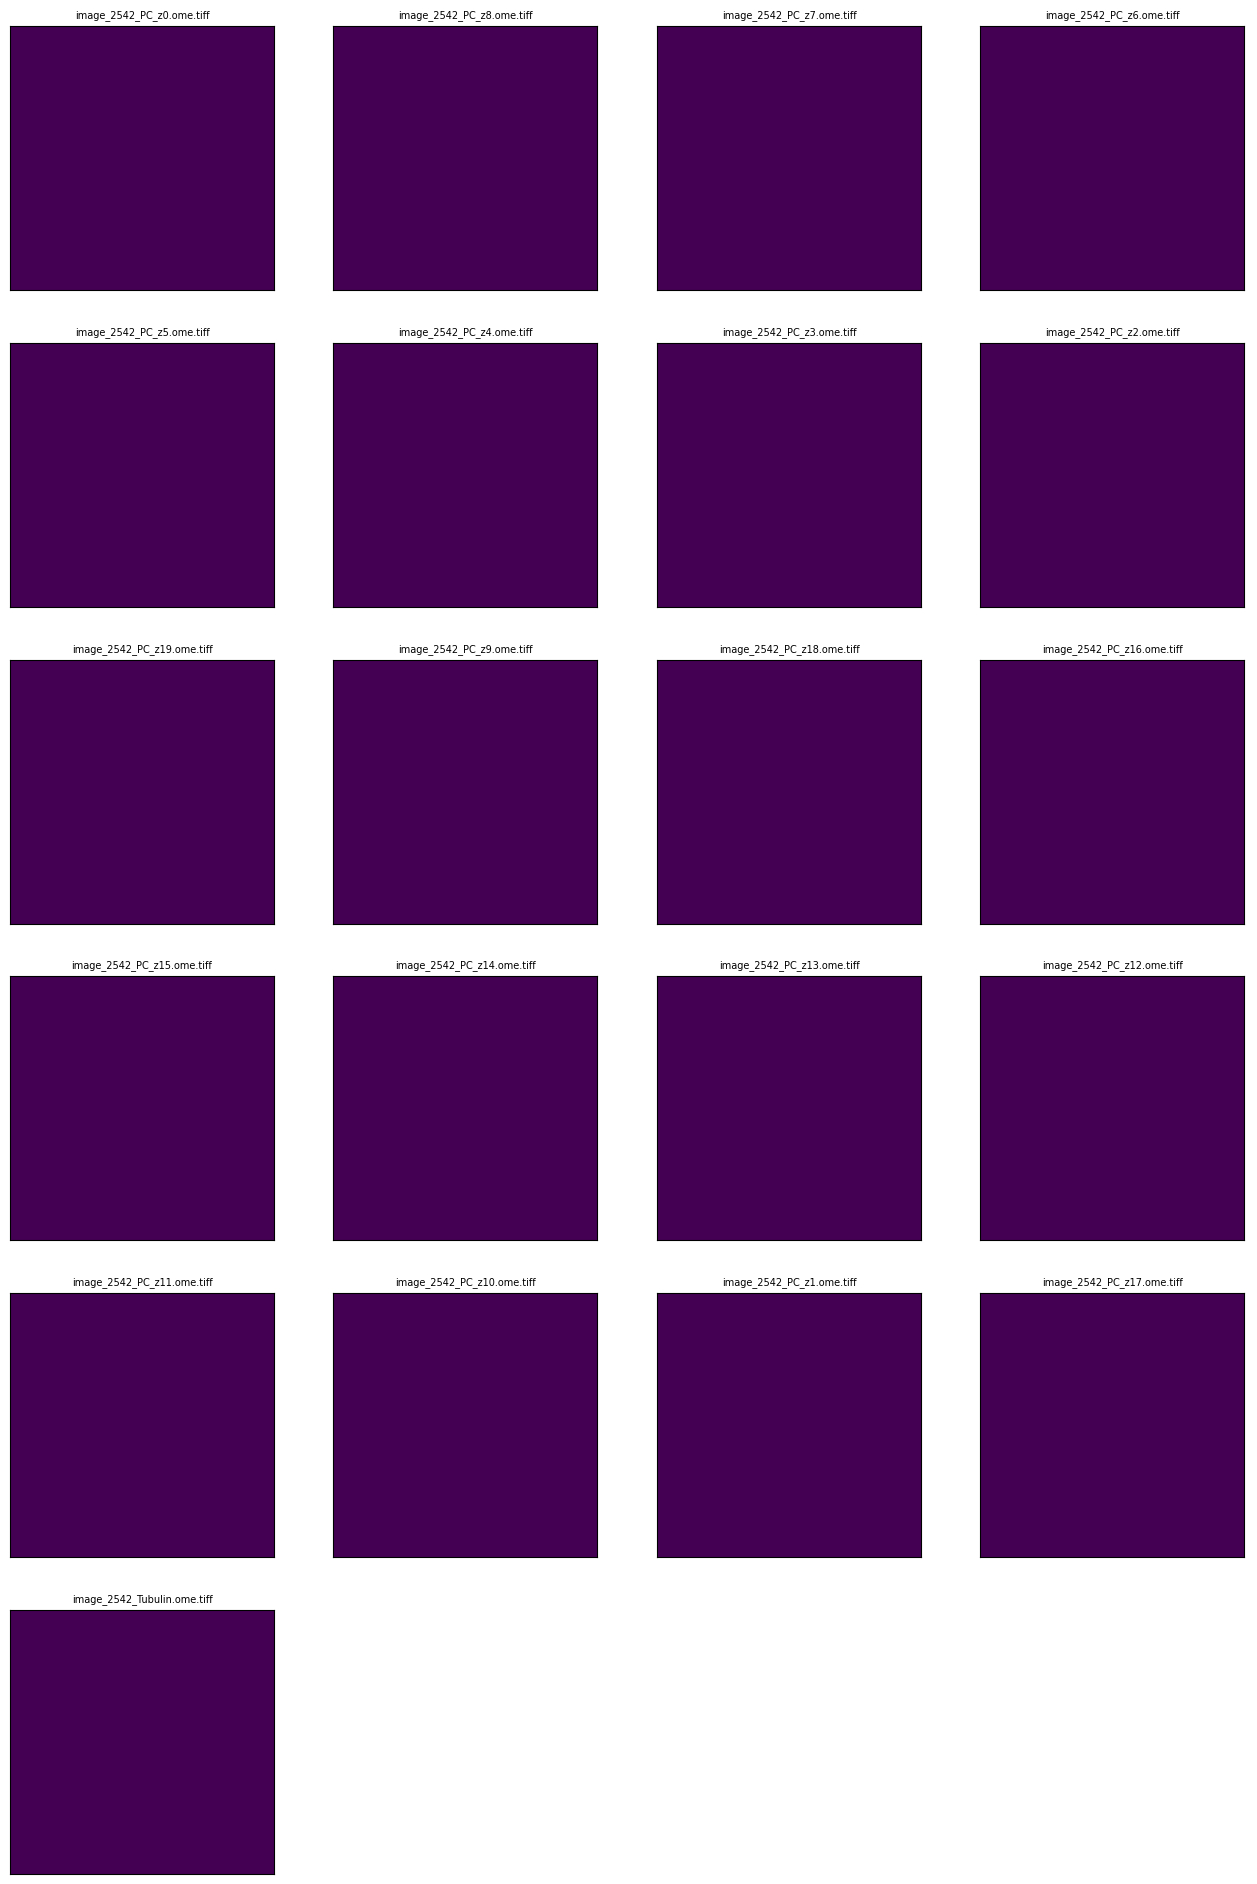

In [13]:
dark_images = imagelab.issues[imagelab.issues["is_dark_issue"] == True].sort_values(
    by=["dark_score"]
)
dark_images = dark_images.index.tolist()
imagelab.visualize(image_files=dark_images[:21], cell_size=(4, 4))

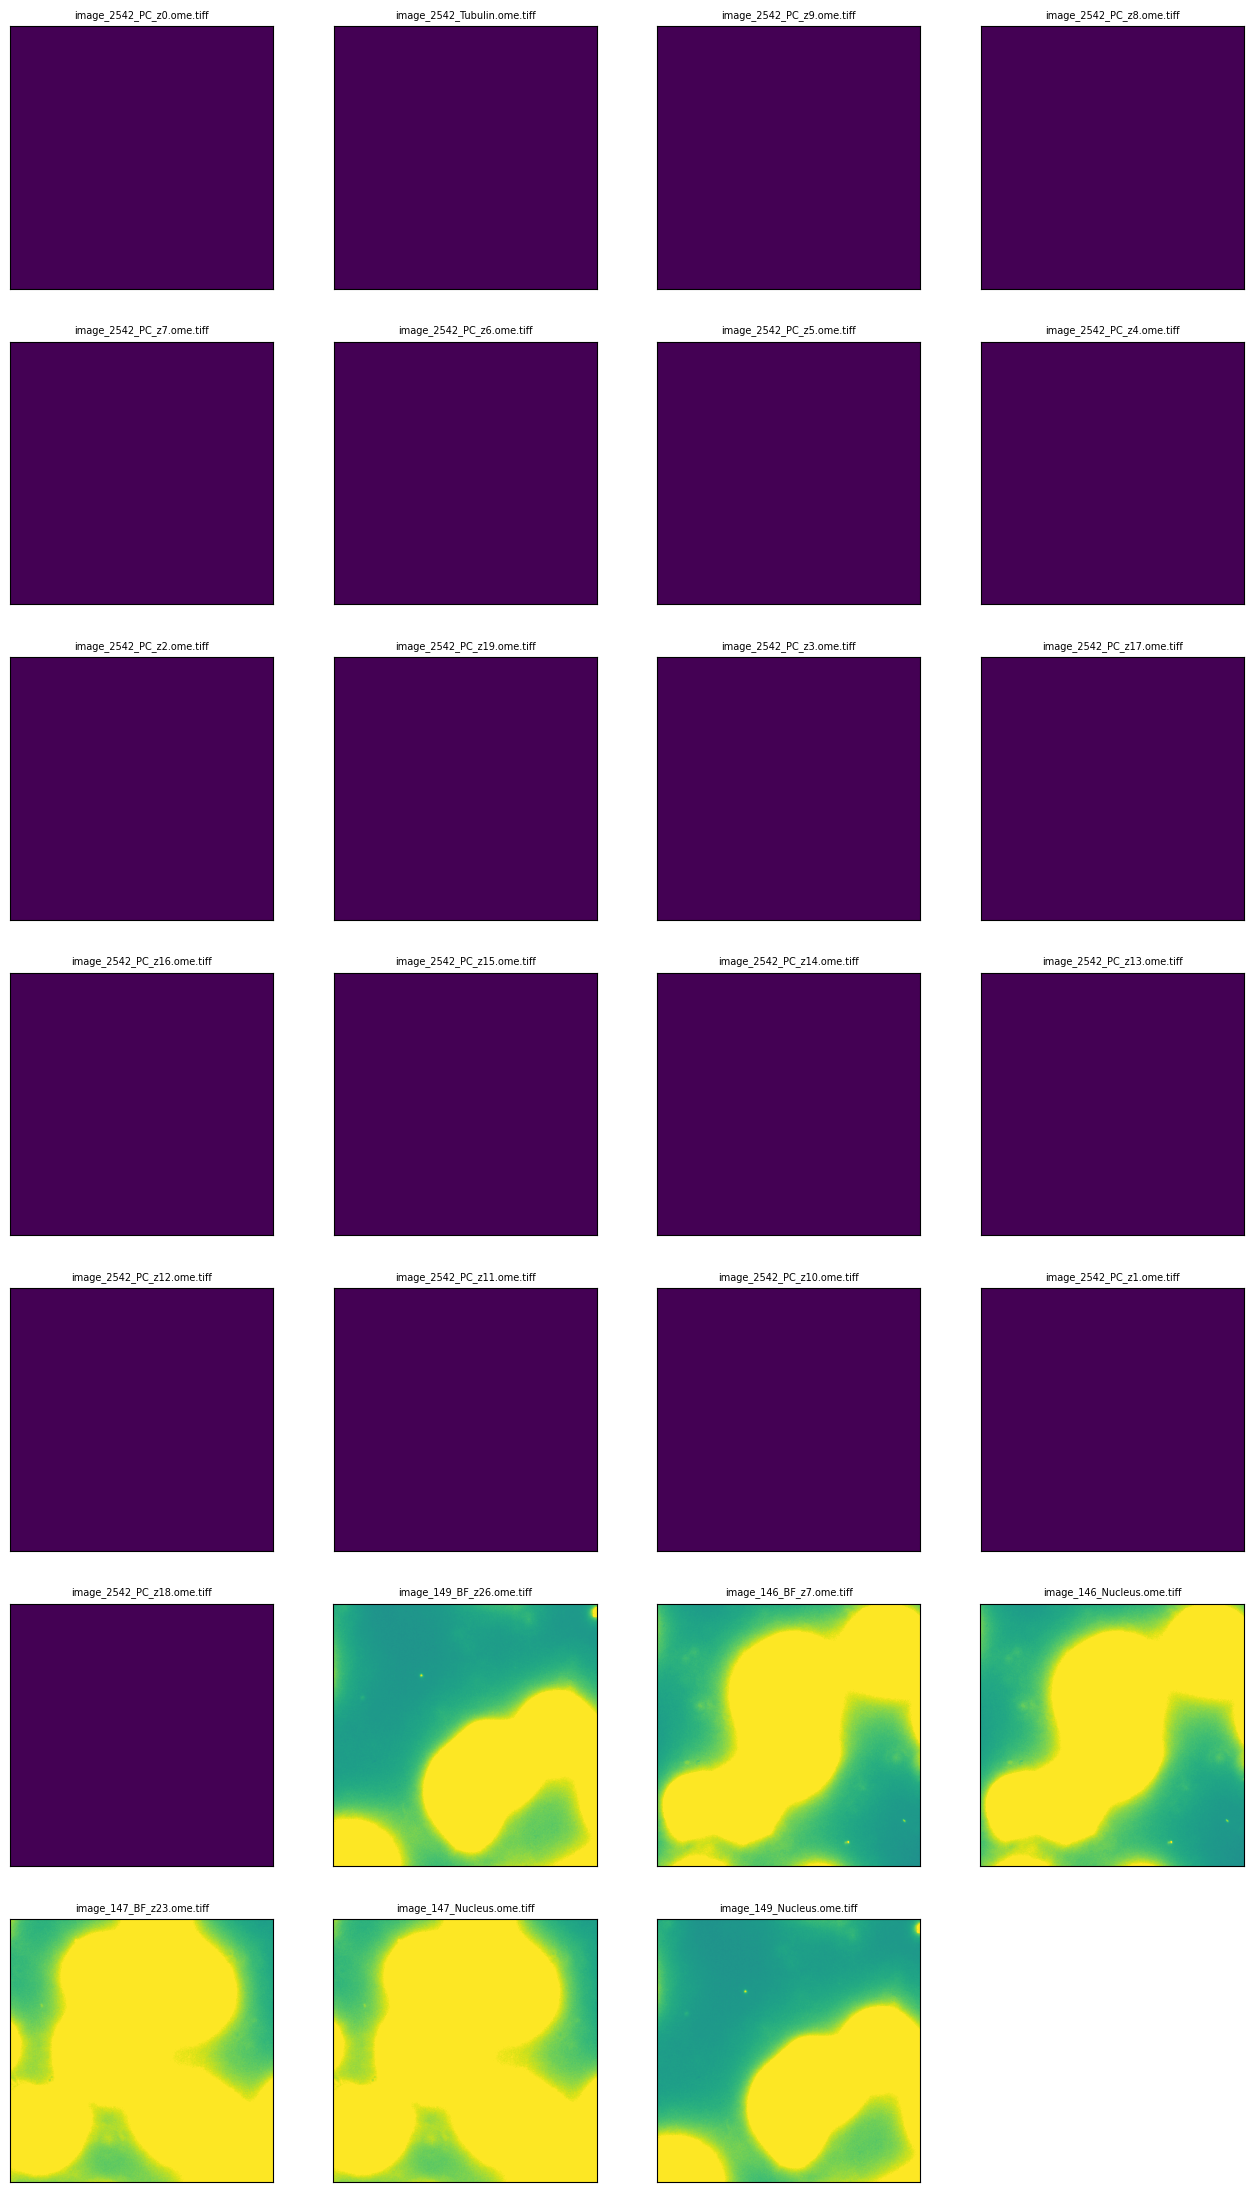

In [16]:
duplicate_images = imagelab.issues[
    imagelab.issues["is_exact_duplicates_issue"] == True
].sort_values(by=["exact_duplicates_score"])
duplicate_images = duplicate_images.index.tolist()
imagelab.visualize(image_files=duplicate_images[:27], cell_size=(4, 4))

The above method can only address the darkness and duplication problem. To detect other issues like noise, we need to apply other methods.

- reference: [low quality image detection](https://github.com/ngshya/low-quality-image-detection/tree/main)
- tutorial: https://towardsdatascience.com/low-quality-image-detection-machine-learning-fdc2c1ba86e1